## Application Flow 
Ensemble technique is one of the most fundamental algorithms for classification and regression in the Machine Learning world.

But before proceeding with the algorithm, let’s first discuss the lifecycle of any machine learning model. This diagram explains the creation of a Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. 
A typical lifecycle diagram for a machine learning model looks like:

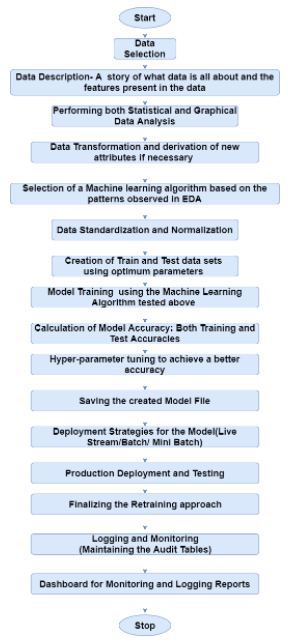

## Ensemble Techniques

We regularly come across many game shows on television and you must have noticed an option of “Audience Poll”. Most of the times a contestant goes with the option which has the highest vote from the audience and most of the times they win. We can generalize this in real life as well where taking opinions from a majority of people is much more preferred than the opinion of a single person.
Ensemble technique has a similar underlying idea where we aggregate predictions from a group of predictors, which may be classifiers or regressors, and most of the times the prediction is better than the one obtained using a single predictor. Such algorithms are called Ensemble methods and such predictors are called Ensembles.

Let’s suppose we have ‘n’ predictors:

Z1, Z2, Z3, ......., Zn with a standard deviation of σ

Var(z) = σ^2

If we use single predictors Z1, Z2, Z3, ......., Zn the variance associated with each will be σ2 but the expected value will be the average of all the predictors.

Let’s consider the average of the predictors:

µ = (Z1 + Z2 + Z3+.......+ Zn)/n

if we use µ as the predictor then the expected value still remains the same but see the variance now:

variance(µ) = σ^2/n

So, the expected value remained ‘µ’ but variance decreases when we use average of all the predictors.

This is why taking mean is preferred over using single predictors.

Ensemble methods take multiple small models and combine their predictions to obtain a more powerful predictive power.

There are few very popular Ensemble techniques which we will talk about in detail such as Bagging, Boosting, stacking etc.

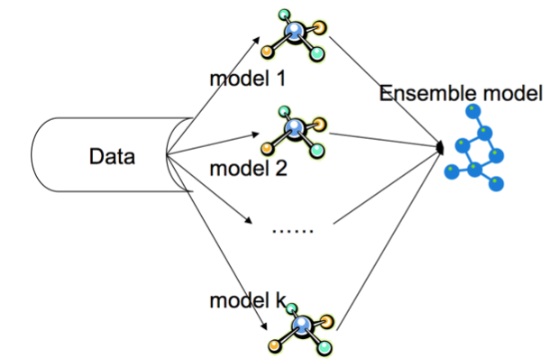

image courtsey: Google

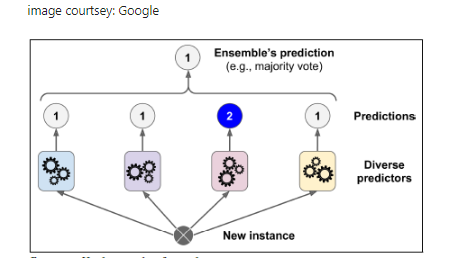                         



### Bagging (Bootstrap Aggregation)

In real life scenarios we don’t have multiple different training sets on which we can train our model separately and at the end combine their result. Here, bootstrapping comes into picture. Bootstrapping is a technique of sampling different sets of data from a given training set by using replacement. After bootstrapping the training dataset, we train model on all the different sets and aggregate the result. This technique is known as Bootstrap Aggregation or Bagging.

Let’s see definition of bagging:

Bagging is the type of ensemble technique in which a single training algorithm is used on different subsets of the training data where the subset sampling is done with replacement (bootstrap). 
Once the algorithm is trained on all the subsets, then bagging makes the prediction by aggregating all the predictions made by the algorithm on different subsets. In case of regression, bagging prediction is simply the mean of all the predictions and in the case of classifier, bagging prediction is the most frequent prediction (majority vote) among all the predictions.

Bagging is also known as parallel model since we run all models parallely and combine there results at the end.

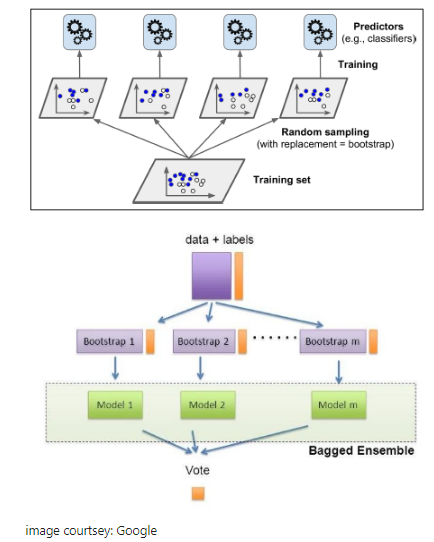

image courtsey: Google

* Advantages of a Bagging Model

1)	Bagging significantly decreases the variance without increasing bias. 

2)	Bagging methods work so well because of diversity in the training data since the sampling is done by bootstraping.

3)	Also, if the training set is very huge, it can save computional time by training model on relatively smaller data set and still can increase the accuracy of the model.

4) Works well with small datasets as well.

* **Disadvantage of a Bagging Model

The main disadvantage of Bagging is that it improves the accuracy of the model on the expense of interpretability i.e. if a single tree was being used as the base model, then it would have a more attarctive and easily interpretable diagram, but with use of bagging this interpretability gets lost.

## Pasting

Pasting is an ensemble technique similar to bagging with the only difference being that there is no replacement done while sampling the training dataset. This causes less diversity in the sampled datasets and data ends up being correlated. That's why bagging is more preffered than pasting in real scenarios.

## Out-of-Bag Evaluation

In bagging, when different samples are collected, no sample contains all the data but a fraction of the original dataset.
There might be some data which are never sampled at all. The remaining data which are not sampled are called out of bag instances. Since the model never trains over these data, they can be used for evaluating the accuracy of the model by using these data for predicition. We do not need validation set or cross validation and can use out of bag instances for that purpose.




Let's see python implementation of Bagging:

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

In [5]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

clf1 = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0).fit(X_train, y_train)

In [10]:
clf2 = BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=10, random_state=0).fit(X_train, y_train)

In [11]:
clf3 = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=10, random_state=0).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [14]:
clf4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10, random_state=0).fit(X_train, y_train)

In [21]:
clf5 = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=10, random_state=0).fit(X_train, y_train)

In [15]:
clf1.score(X_test, y_test)

0.9370629370629371

In [16]:
clf2.score(X_test, y_test)

0.9300699300699301

In [17]:
clf3.score(X_test, y_test)

0.9370629370629371

In [18]:
clf4.score(X_test, y_test)

0.972027972027972

In [22]:
clf5.score(X_test, y_test)

0.965034965034965

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [20]:
rfc.score(X_test, y_test)

0.958041958041958

In [24]:
(0.965034965034965-0.958041958041958)*100

0.6993006993006978

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.916083916083916

In [83]:
dtc_old=DecisionTreeClassifier()
dtc_old.fit(X_train, y_train)
dtc_old.score(X_test, y_test)

0.71875

In [82]:
len(X_train)

576

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

let's using bagging over our KNN classifier and see if our score improves:

In [84]:
bag_knn = BaggingClassifier(dtc,
                            n_estimators=50, max_samples=0.5,
                            bootstrap=True, random_state=0,oob_score=True)

In [85]:
bag_knn.fit(X_train, y_train)
bag_knn.score(X_test, y_test)

0.7864583333333334

In [75]:
#Let's check the out of bag score 
bag_knn.oob_score_

0.9295774647887324

Great! our score sginificantly improves with use of bagging.

let's not use bootstrap and see the model accuracy! Remember this is "Pasting"

In [9]:

pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=False, random_state=3) 

In [10]:
pasting_knn.fit(X_train, y_train)
pasting_knn.score(X_test, y_test)

0.9300699300699301

## Random Forests

Decision trees are one of such models which have low bias but high variance. We have studied that decision trees tend to overfit the data. So bagging technique becomes a very good solution for decreasing the variance in a decision tree.
Instead of using a bagging model with underlying model as a decision tree, we can also use Random forest which is more convenient and well optimized for decision trees. The main issue with bagging is that there is not much independence among the sampled datasets i.e. there is correlation. The advantage of random forests over bagging models is that the random forests makes a tweak in the working algorithm of bagging model to decrease the correlation in trees.  The idea is to introduce more randomness while creating trees which will help in reducing correlation.

Let’s understand how algorithm works for a random forest model:

1)	Just like in bagging, different samples are collected from the training dataset using bootstraping.

2)	On each sample we train our tree model and we allow the trees to grow with high depths. 

    Now, the difference with in random forest is how the trees are formed. In bootstraping we allow all the sample data to be used for splitting the nodes but not   with random forests.  When building a decision tree, each time a split is to happen, a random sample of ‘m’ predictors are chosen from the total ‘p’ predictors. Only those ‘m’ predictors are allowed to be used for the split.

    Why is that?

    Suppose in those ‘p’ predictors, 1 predictor is very strong. Now each sample this predictor will remain the strongest. So, whenever trees will be built for these sampled data, this predictor will be chosen by all the trees for splitting and thus will result in similar kind of tree formation for each bootstrap model. This introduces correaltion in the dataset and averaging correalted dataset results do not lead low variance. That’s why in random forest the choice for selecting node for split is limited and it introduces randomness in the formation of the trees as well.
    Most of the predictors are not allowed to be considered for split.
    Generally, value of ‘m’ is taken as m ≈√p , where ‘p’ is the number of predictors in the sample.

    When m=p , the random forest model becomes bagging model.   
              
    *This method is also referred as “Feature Sampling”

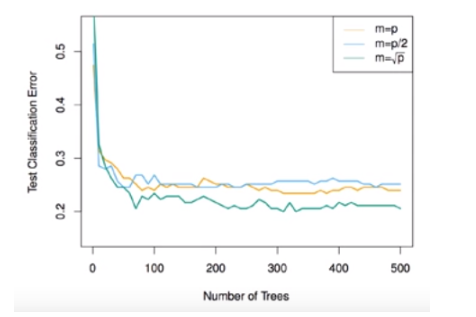


    The above graph represents the decrease in test classifcation error as we select different     
    values  of ‘m’.

3)	Once the trees are formed, prediction is made by the random forest by aggregating the predictions of all the model.  For regression model, the mean of all the predictions is the final prediction and for classification mode, the mode of all the predictions is considered the final predictions. 



#### Working of a Random Forest Model

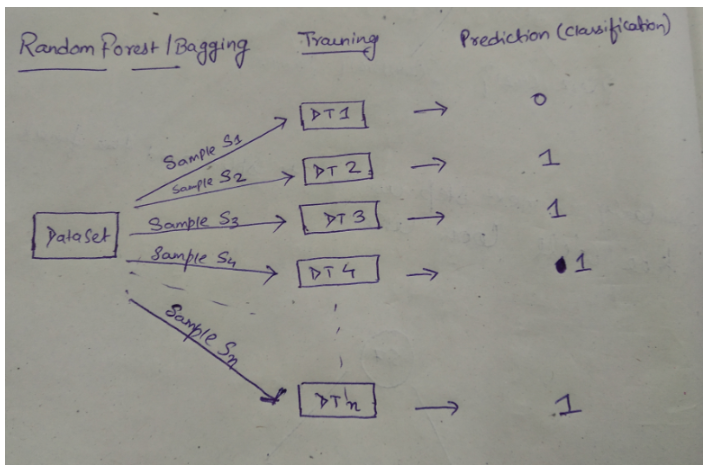

From the given dataset different samples are created by bootstrapping and these samples are used to train different decision trees. Once the training is complete, prediction is made using all the different models.


#### Predicting Outcome

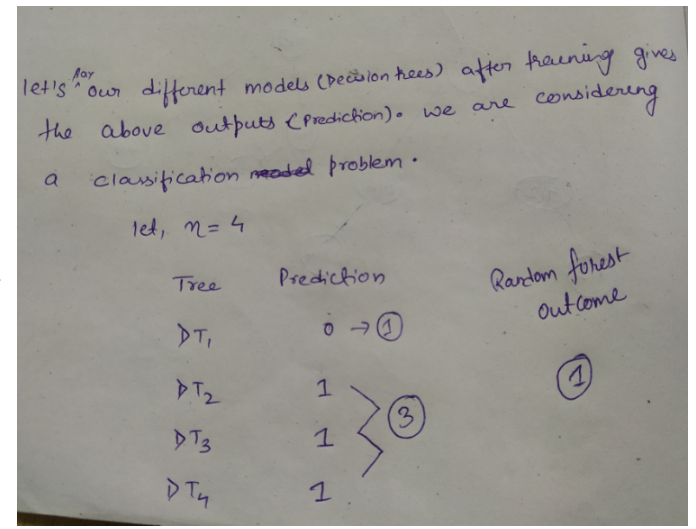

Random forest makes the prediction by taking the mode of all the predictions made by all the models, since this is the case of classification. This process is also known as “Majority voting”.
We can also use prediction probability to make the final prediction. We can use the predict_proba method, which will predict a probability from 0 to 1 that a given class is the right one for a row. For a problem with output being only 0 and 1, we'll get a matrix with as many rows as there is in the data and 2 columns. predict_proba will return something like this:

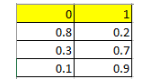

Each row corresponds to a prediction. The first column is the probability that the prediction is a 0, the second column is the probability that the prediction is a 1. Each row adds up to 1.

If we just take the second column, we get the average value that the classifier would predict for that row. If there's a .9 probability that the correct classification is 1, we can use the .9 as the value the classifier is predicting. This will give us a continuous output in a single vector instead of just 0 or 1.
We can then add all of the vectors we get through this method together and divide by the number of vectors to get the mean prediction by all the members of the ensemble. We can then round off to get 0 or 1 predictions.
Similarly, in case of regression Random forest makes the prediction by taking the mean of all the predictions made by different models. 

#### Advantages and Disadvantages of Random Forest:

1)	It can be used for both regression and classification problems.

2)	Since base model is a tree, handling of missing values is easy.

3)	It gives very accurate result with very low variance.

4)	Results of a random forest are very hard to interpret in comparison with decision trees.

5)	High computational time than other respective models.


Random Forest should be used where accuracy is up utmost priority and interpretability is not very important. Also, computational time is less expensive than the desired outcome.


# Cross-Validation

Suppose you train a model on a given dataset using any specific algorithm. You tried to find the accuracy of the trained model using the same training data and found the accuracy to be 95% or maybe even 100%. What does this mean? Is your model ready for prediction? The answer is no.
Why? Because your model has trained itself on the given data, i.e. it knows the data and it has generalized over it very well. But when you try and predict over a new set of data, it’s most likely to give you very bad accuracy, because it has never seen the data before and thus it fails to generalizes well over it. This is the problem of overfitting. 
To tackle such problem, Cross-validation comes into the picture. Cross-validation is a resampling technique with a basic idea of dividing the training dataset into two parts i.e. train and test. On one part(train) you try to train the model and on the second part(test) i.e. the data which is unseen for the model, you make the prediction and check how well your model works on it. If the model works with good accuracy on your test data, it means that the model has not overfitted the training data and can be trusted with the prediction, whereas if it performs with bad accuracy then our model is not to be trusted and we need to tweak our algorithm.


Let’s see the different approaches of Cross-Validation:

*	Hold Out Method: 

It is the most basic of the CV techniques. It simply divides the dataset into two sets of training and test. The training dataset is used to train the model and then test data is fitted in the trained model to make predictions. We check the accuracy and assess our model on that basis. This method is used as it is computationally less costly. But the evaluation based on the Hold-out set can have a high variance because it depends heavily on which data points end up in the training set and which in test data. The evaluation will be different every time this division changes.

*	k-fold Cross-Validation

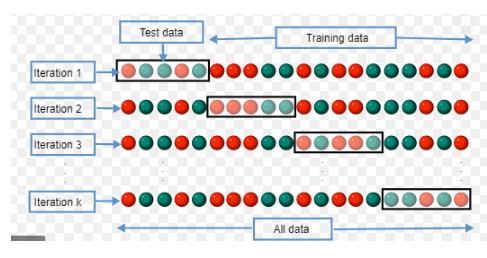

 img_src:Wikipedia

To tackle the high variance of Hold-out method, the k-fold method is used. The idea is simple, divide the whole dataset into ‘k’ sets preferably of equal sizes. Then the first set is selected as the test set and the rest ‘k-1’ sets are used to train the data. Error is calculated for this particular dataset.
Then the steps are repeated, i.e. the second set is selected as the test data, and the remaining ‘k-1’ sets are used as the training data. Again, the error is calculated. Similarly, the process continues for ‘k’ times. In the end, the CV error is given as the mean of the total errors calculated individually, mathematically given as:

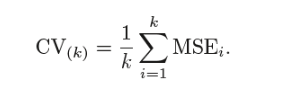
                                               
The variance in error decreases with the increase in ‘k’. The disadvantage of k-fold cv is that it is computationally expensive as the algorithm runs from scratch for ‘k’ times.

*  Leave One Out Cross Validation (LOOCV)

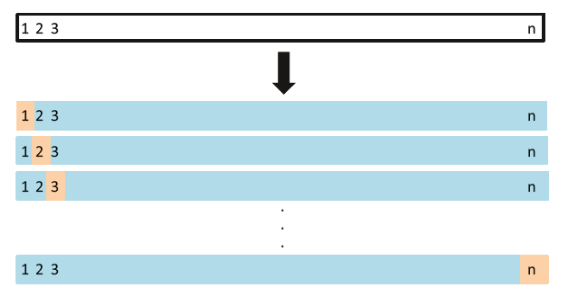
 
LOOCV is a special case of k-fold CV, where k becomes equal to n (number of observations). So instead of creating two subsets, it selects a single observation as a test data and rest of data as the training data. The error is calculated for this test observations. Now, the second observation is selected as test data, and the rest of the data is used as the training set. Again, the error is calculated for this particular test observation. This process continues ‘n’ times and in the end, CV error is calculated as:

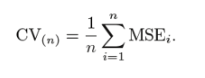
                                             

### Bias Variance tradeoff for k-fold CV, LOOCV and Holdout Set CV

There is a very good explanation given in the ISLR Book as given below:


A k-fold CV with k < n has a computational advantage to LOOCV. But putting computational issues aside,
a less obvious but potentially more important advantage of k-fold CV is that it often gives more accurate estimates of the test error rate than does LOOCV.
The validation set approach can lead to overestimates of the test error rate since in this approach the
the training set used to fit the statistical learning method contains only half the observations of the entire data set. Using this logic, it is not hard to see that LOOCV will give approximately unbiased estimates of the test error since each training set contains n − 1 observations, which is almost as many as the number of observations in the full data set. And performing k-fold CV for, say, k = 5 or k = 10 will lead to an intermediate level of bias since each training set contains (k − 1)n/k observations—fewer than
in the LOOCV approach, but substantially more than in the validation set approach. Therefore, from the perspective of bias reduction, it is clear that LOOCV is to be preferred to k-fold CV. However, we know that bias is not the only source for concern in an estimating procedure; we must also consider the procedure’s variance. It turns out that LOOCV has higher variance than does k-fold CV with k < n. Why
is this the case? When we perform LOOCV, we are in effect averaging the outputs of n fitted models, each of which is trained on an almost identical set of observations; therefore, these outputs are highly (positively) correlated with each other. In contrast, when we perform k-fold CV with k < n, we are averaging the outputs of k fitted models that are somewhat less correlated with each other since the overlap between the training sets in each model is smaller. Since the mean of many highly correlated quantities has higher variance than does the mean of many quantities that are not as highly correlated, the test error estimate resulting from LOOCV tends to have higher variance than does the test error estimate resulting from k-fold CV.
















Let's see the python implementation of Random forest.

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\virat\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [22]:
data = pd.read_csv("winequality_red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


The data set consists following Input variables :
1 - fixed acidity  2 - volatile acidity  3 - citric acid  4 - residual sugar  5 - chlorides  6 - free sulfur dioxide

7 - total sulfur dioxide  8 - density  9 - pH   10 - sulphates   11 - alcohol

and the Output variable gives the quality of th wine based on the input variables: 

12 - quality (score between 0 and 10)

In [17]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
X = data.drop(columns = 'quality')
y = data['quality']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [39]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier( min_samples_split= 2)
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.61875

In [49]:
#let's first visualize the tree on the data without doing any pre processing
clf2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=24,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
clf2.score(x_test,y_test)

0.6104166666666667

In [120]:
rand_clf = RandomForestClassifier(random_state=6)

In [ ]:
rand_clf.feature_importances_

Random state, if given none then score will vary everytime you run the RandomForestClassifier. If we asssign a value to it, then result will remain constant.

In [121]:
rand_clf.fit(x_train,y_train)

C:\Users\Mohit Kashyap\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [122]:
rand_clf.score(x_test,y_test)

0.64375

We can see that two individual decision trees have both less score than a single random forest classifier. 

So, using random forest classifier has increased the predicitive power of our model. 

Great, let's do some hyperparameter tuning and see if we can increase our accuracy more.

Random forest hyperparameters are a combination of best hyperparameters of both decision tree and Bagging classifier.

* Hyperparameters of Decision tree: 

class_weight=None, criterion='entropy', max_depth=24,max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'
                    
* Hyperparameters of Bagging classifier:

base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False
                  
* Hyperparameters of Random forest classifier:

bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False

Let's now try to tune some hyperparameters using the GridSearchCV algorithm.
We have studied about CrossValidation in upcoming lecture. 

GridSearchCV is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search.
It does a exhaustive generation of combination of different parameters passed.
Using cross validation score, Grid Search returns the combination of hyperparameters for which the model is performing the best. 

Note that it is common that a small subset of those parameters can have a large impact on the predictive or computation performance of the model while others can be left to their default values. 

In [87]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [88]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [89]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [126]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 90}

We will pass these parameters into our random forest classifier.

In [127]:
rand_clf = RandomForestClassifier(criterion= 'entropy',
 max_depth = 12,
 max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split= 5,
 n_estimators = 90,random_state=6)

In [128]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=12, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [129]:
rand_clf.score(x_test,y_test)

0.6604166666666667

Great! Our accuracy has increased by 2% after using the best parameters for GridsearchCV.

Let's do some more tweak in the hyper parameters and try gridSearch on it.

In [139]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [140]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [141]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.5min finished
C:\Users\Mohit Kashyap\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=12,
                                              max_features='log2',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=6,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterio

In [143]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 115}

In [144]:
rand_clf = RandomForestClassifier(criterion= 'entropy',
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 4,
 n_estimators = 115,random_state=6)

In [145]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=115,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [146]:
rand_clf.score(x_test,y_test)

0.6729166666666667

Our accuracy has improved and score is better than the last grid search. So, we can say that giving all the hyperparameters in the gridSearch 
doesn't gurantee the best result. We have to do hit and trial with parameters to get the perfect score.

You are welcome to try tweaking the parameters more and try an improve the accuracy more.



In [149]:
# let's save the model

import pickle

with open('D:\ineuron_materials_ipynb\iNeuron\EnsembleLearning_And_RandomForest'+ '/modelForPrediction.sav', 'wb') as f:
    pickle.dump(rand_clf,f)


## Stacking (Stacked Generalization)

Stacking is a type of ensemble technique which combines the predictions of two or more models, also called base models, and use the combination as the input for a new model (meta-model) i.e. a new model is trained on the predictions of the base models. 
 

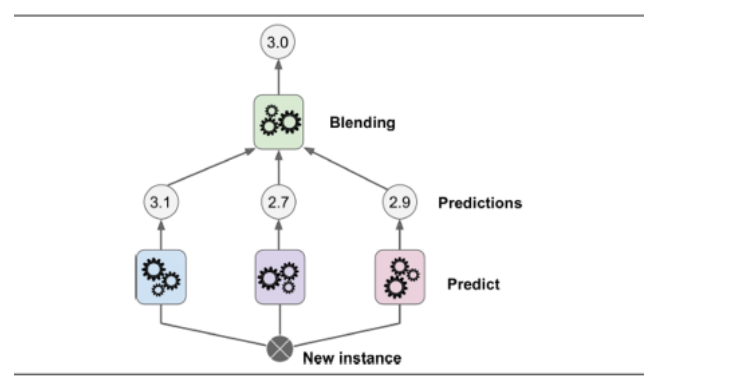


Suppose you have a classification problem and you can use several models like logistic regression, SVM, KNN, Random forest etc. The idea is to use few models like KNN, SVM as the base model and make predictions using these models. Now the predictions made by these models are used as an input feature for Random forest to train on and give prediction.


Stacking, just like other ensemble techniques, tries to improve the accuracy of a model by using predictions of not so good models and then using those predictions as an input feature for a better model.

Stacking can be multilevel e.g. using base models as level 1 then passing the predictions into another set of sub-base models at level 2 and so on. Then at the end using meta-model/models which take predictions of the last sub base models as input and does prediction.

Let's understand more by looking at the steps involved for stacking:

*	Split the dataset into a training set and a holdout set. We can use k-fold validation for seleting different set of validation sets.

   Generally, we do a 50-50 split of the training set and the hold out set. 
   
   training set = x1,y1
   hold out set = x2, y2

*	Split the training set again into training and test dataset e.g. x1_train, y1_train, x1_test, y1_test

*	Train all the base models on training set  x1_train, y1_train.

*	After training is done, get the predictions of all the base models on the validation set x2. 

*	Stack all these predictions together (you can also take an average of all the predictions or probability prediction) as it will be used as input feature for the meta_model.

*	Again, get the prediction for all the base models on the test set i.e. x1_test 

*	Again, stack all these predictions together (you can also take an average of all the predictions or probability prediction) as it will be used as the prediction dataset for the meta_model.

*	Use the stacked data from step 5 as the input feature for meta_model and validation set y2 as the target variable and train the model on these data.

*	Once, the training is done check the accuracy of meta_model by using data from step 7 for prediction and y1_test for evaluation.


Although, there is no libraries available in Sklearn for stacking, it can still be implemented.

Let's understand more about stacking with python implementation:


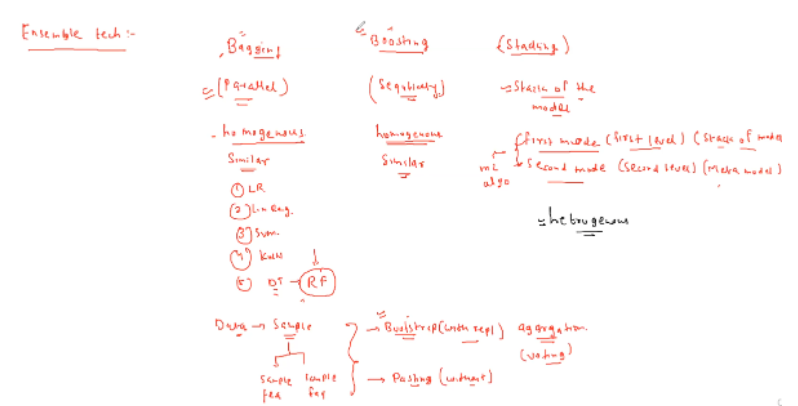

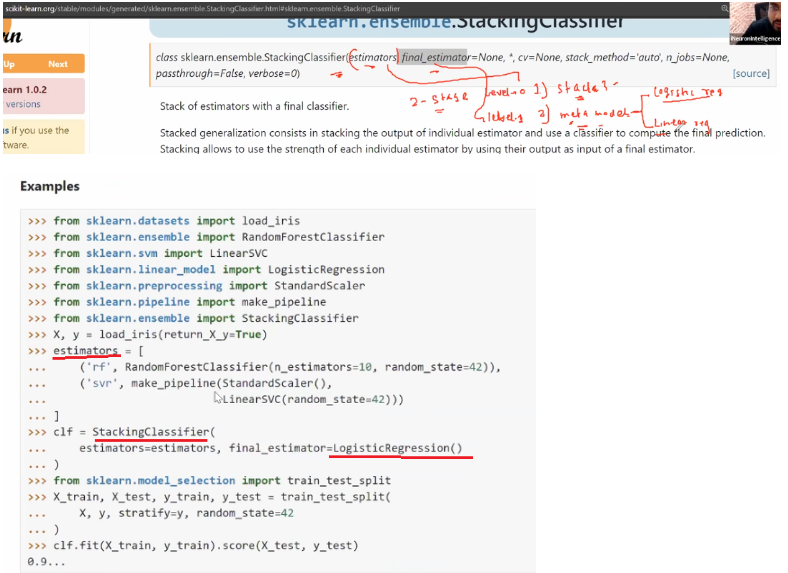

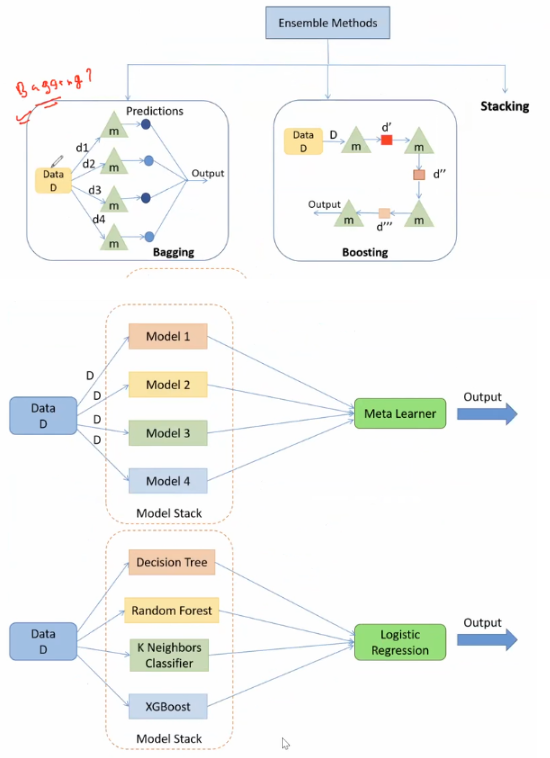

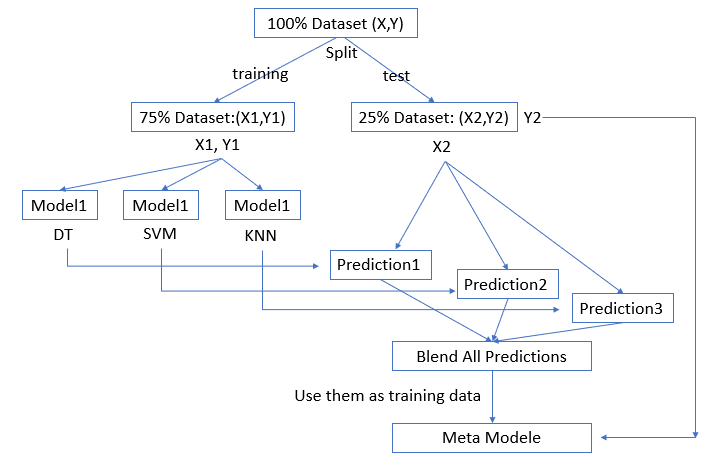

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np


In [2]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
X = data.drop(columns = 'Outcome')
y = data['Outcome']

In [7]:
X.shape

(768, 8)

In [4]:
# let's divide our dataset into training set and hold out set by 50%
train,val_train,test,val_test = train_test_split(X,y,test_size=0.5, random_state= 355)

In [5]:
print(len(train))
print(len(val_train))
print(len(test))
print(len(val_test))

384
384
384
384


In [8]:
# let's split the training set again into training and test dataset 
x_train,x_test,y_train,y_test =  train_test_split(train,test,test_size=0.2, random_state= 0)

In [9]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

307
77
307
77


We will use KNN and SVM algorithm as our base models.

Let's fit both of the models first on the x_train and y_train data.

In [10]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
knn.score(x_test,y_test)

0.7142857142857143

In [12]:
# rand_clf = RandomForestClassifier()

# rand_clf.fit(x_train,y_train)


svm = SVC(probability=True)
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [13]:
#rand_clf.score(x_test,y_test)

svm.score(x_test,y_test)

0.7402597402597403

Let's get the predictions of all the base models on the validation set val_train.

In [14]:
predict_val1 = knn.predict(val_train)
predict_val2 = svm.predict(val_train)
#predict_val2 = rand_clf.predict(val_train)

Let's stack the prediciton values for validation set together as "predict_val"

In [15]:
predict_val = np.column_stack((predict_val1,predict_val2))
predict_val

array([[0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [1,

Let's get the prediction for all the base models on the test set  x_test

In [64]:
predict_test1 = knn.predict(x_test)
predict_test2 = svm.predict(x_test)
#predict_test2 = rand_clf.predict(x_test)

Let's stack the prediciton values for validation set together as "predict_test"

In [65]:
predict_test = np.column_stack((predict_test1,predict_test2))
predict_test

array([[1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1,

Let's use the Use the stacked data "predict_val" and val_test as the input feature for meta_model i.e. randomforest classifier

In [66]:
# svm = SVC()
#svm.fit(predict_val,val_test)

In [67]:
#svm.score(predict_test,y_test)

In [68]:
rand_clf = RandomForestClassifier()

rand_clf.fit(predict_val,val_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Let's check the accuracy of our meta_model using predict_test and y_test.

In [40]:
rand_clf.score(predict_test,y_test)

0.7402597402597403

In [41]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [42]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [43]:
grid_search.fit(predict_val,val_test)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [49]:
grid_search.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 90}

In [69]:
rand_clf = RandomForestClassifier( criterion='gini',max_features = 'auto',min_samples_leaf =1,min_samples_split= 4,n_estimators =90)

In [70]:
rand_clf.fit(predict_val,val_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

616    0
727    0
93     1
503    0
596    0
678    1
419    1
653    0
99     1
405    0
734    0
174    0
351    0
215    1
22     1
576    0
126    0
463    0
29     0
680    0
553    0
586    1
757    1
68     0
401    0
301    1
312    1
384    0
654    0
677    0
      ..
557    0
510    1
690    0
402    1
525    0
710    0
632    0
306    1
749    1
89     0
496    0
305    0
327    0
316    0
660    0
437    0
30     0
43     1
120    1
289    0
695    1
505    0
533    0
544    0
258    0
435    1
236    1
167    0
379    0
442    0
Name: Outcome, Length: 384, dtype: int64

In [52]:
rand_clf.score(predict_test,y_test)

0.7402597402597403

In [71]:
# one more way for stacking
from mlxtend.classifier import StackingClassifier
rand_clf2 = RandomForestClassifier()

In [72]:
sclf=StackingClassifier(classifiers=[knn,svm], use_probas=True, meta_classifier=rand_clf2)

In [73]:
sclf.fit(predict_val,val_test)

StackingClassifier(average_probas=False,
                   classifiers=[KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=5,
                                                     p=2, weights='uniform'),
                                SVC(C=1.0, break_ties=False, cache_size=200,
                                    class_weight=None, coef0=0.0,
                                    decision_function_shape='ovr', degree=3,
                                    gamma='scale', kernel='rbf', max_iter=-1,
                                    probability...
                                                          max_leaf_nodes=None,
                                                          max_samples=None,
            

In [74]:
sclf.score(predict_test,y_test)

0.7402597402597403

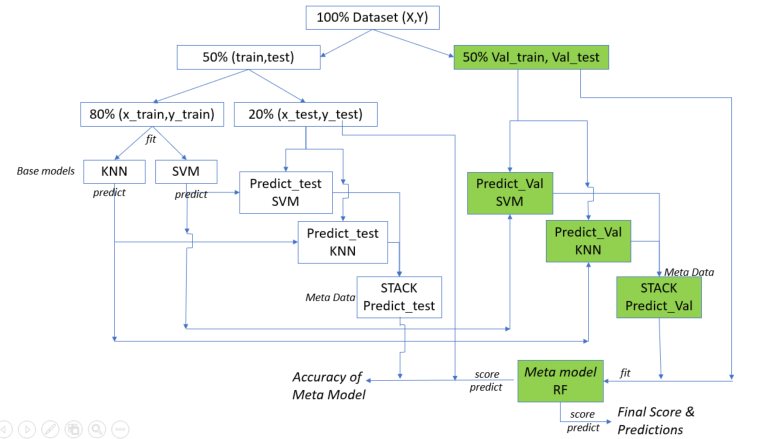

Let's see the cloud deployment for Random forest algorithm.

## Cloud  Deployment (Azure)

Once the training is completed, we need to expose the trained model as an API for the user to consume it. For prediction, the saved model is loaded first and then the predictions are made using it. If the web app works fine, the same app is deployed to the cloud platform. The application flow for cloud deployment looks like:

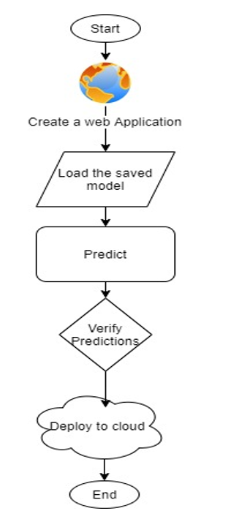


### Pre-requisites for cloud deployment:
* Basic knowledge of flask framework.
* Any Python IDE installed(we are using PyCharm).
* A Microsoft Azure account.
* Basic understanding of HTML.



###	Deployment to Azure:
•	Go to https://portal.azure.com/ and create an account if already haven’t created one.
•	Go to the Azure account and create a web app.

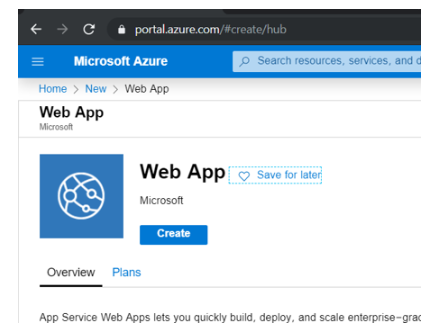
 
•	Provide the app name, resource group(create new if necessary), runtime stack(Python 3.7), region, select the 1 GB size, which is free to use. Click Review+create to create the web app.
 
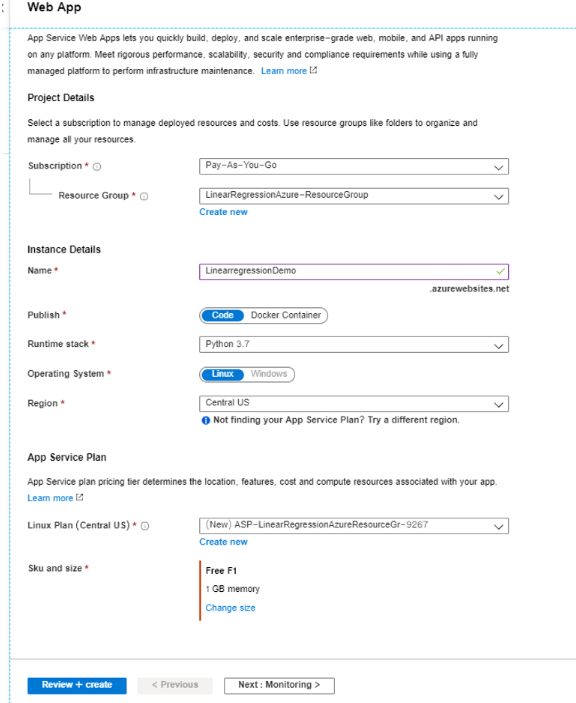

•	Once the deployment is completed, open the app and go to the ‘Deployment Center’ option. Select ‘local git’ for source control and click continue.
 
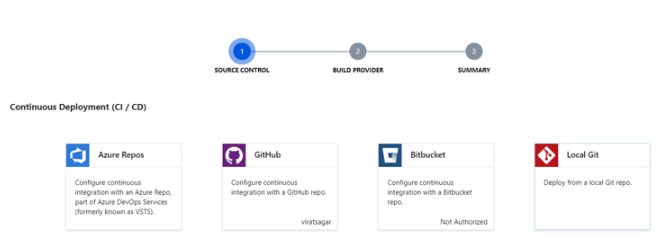


•	Select the kudo ‘App service build provider’ as the build provider and click continue.

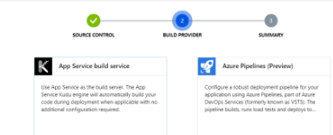
 
•	Click ‘Finish’ to complete the setup.
•	Go to the overview section of the app, and the Git link now will be visible.

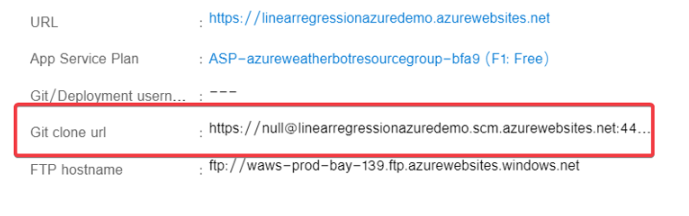
 
•	Go to ‘Deployment Credentials’ and copy the username and password. These will be required when doing the final push to the remote git repository.

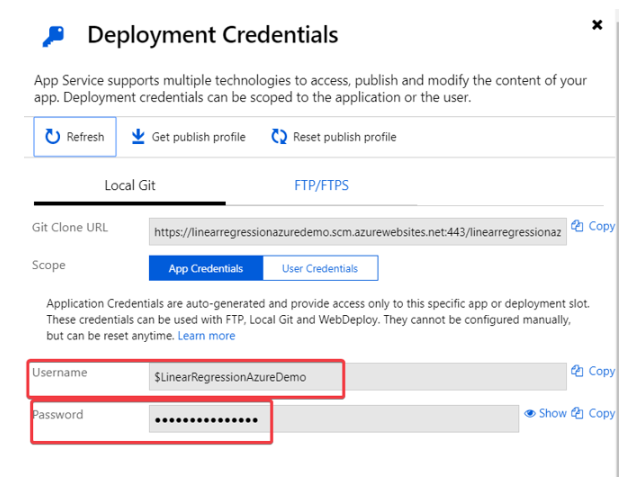

•	Open a command prompt and navigate to your project folder.

•	Run git init to initialise an empty git repository

•	Create a new remote git alias using the command: git remote add <alias> <git clone url>
    
•	Use git add . to add all the files to the local git repository.
    
•	Use git commit –m “First Commit” to commit the code to the git repo.
    
•	Push the code to the remote repo using git push <alias> master –f
    
•	This prompts for a username and password. Provide the same credentials as copied in the step above.
    
•	After deployment, from the ‘overview’ ¬¬¬section, copy the URL and paste into the browser to see the application running.
